<a href="https://colab.research.google.com/github/asy047/TensorFlowDeepLearning/blob/master/0728_Day04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 정규화
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# 과대적합 문제를 회피/해결하기 위해서
# 검증용 데이터셋을 준비하자!
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size = 0.2, random_state = 42)

In [ ]:
print(x_test_scaled.shape)

(10000, 28, 28)


In [ ]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)   # 평면의 집합인 3차원 배열에서 평면에 1이라는 두꼐를 추가한 4차원 배열로 만듦
x_val_scaled = x_val_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train_scaled.shape)
print(x_val_scaled.shape)
print(x_test_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


# 모델 만들기

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))  #filter의 size 3, 3

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten()) # 3D 배열을 1D 배열로 펼쳐줌!
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3)) # 30%의 뉴런을 무작위로 선택해서 학습시키지 않음

model.add(keras.layers.Dense(10, activation='softmax')) # 출력층. 하지만 출력층은 Flatten해서 펼쳐줘야함

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

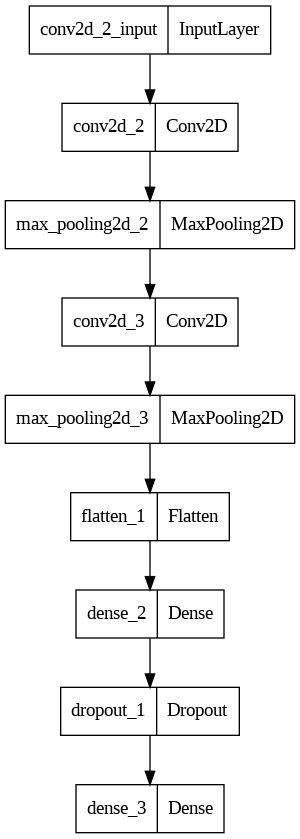

In [ ]:
keras.utils.plot_model(model)

# max_pooling2d -> 지역별로 대표값을 뽑아라(최대값)/ 도장 찍은 값에서 최대값을 뽑아 pooling하면 14, 14, 32의 배열이 튀어나옴 (특성맵)
# max_pooling2d_1 -> 그리고 단무지 같이 생긴.. 좀 직사각형의 filter(도장)을 또 다시 최대 값 뽑아서 특성맵을 만듦
# flatten -> 얘를 Dense 출력에 내보내기 위해 flat하게 펴줌
# dropout으로 나머지 30% 뉴런 평가..학습 등등
# dense_1 -> softmax를 적용해 확률적으로 만든 출력을 내보냄

# 모델 컴파일하고, 모델 학습시키기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 조기 종료를 위한 callback, 최고의 모델을 저장하기 위한 callback

cb_mc = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only= True)
cb_es = keras.callbacks.EarlyStopping(patience= 2, restore_best_weights= True)

In [ ]:
h = model.fit(x_train_scaled, y_train, epochs= 100, verbose= 2, validation_data=(x_val_scaled, y_val), callbacks=[cb_mc, cb_es])

Epoch 1/100
1500/1500 - 7s - loss: 0.4904 - accuracy: 0.8263 - val_loss: 0.3145 - val_accuracy: 0.8862 - 7s/epoch - 5ms/step
Epoch 2/100
1500/1500 - 5s - loss: 0.3200 - accuracy: 0.8856 - val_loss: 0.2680 - val_accuracy: 0.9030 - 5s/epoch - 4ms/step
Epoch 3/100
1500/1500 - 5s - loss: 0.2704 - accuracy: 0.9012 - val_loss: 0.2608 - val_accuracy: 0.9018 - 5s/epoch - 3ms/step
Epoch 4/100
1500/1500 - 6s - loss: 0.2394 - accuracy: 0.9109 - val_loss: 0.2369 - val_accuracy: 0.9112 - 6s/epoch - 4ms/step
Epoch 5/100
1500/1500 - 6s - loss: 0.2140 - accuracy: 0.9199 - val_loss: 0.2383 - val_accuracy: 0.9116 - 6s/epoch - 4ms/step
Epoch 6/100
1500/1500 - 6s - loss: 0.1909 - accuracy: 0.9293 - val_loss: 0.2158 - val_accuracy: 0.9198 - 6s/epoch - 4ms/step
Epoch 7/100
1500/1500 - 6s - loss: 0.1744 - accuracy: 0.9344 - val_loss: 0.2336 - val_accuracy: 0.9144 - 6s/epoch - 4ms/step
Epoch 8/100
1500/1500 - 6s - loss: 0.1595 - accuracy: 0.9408 - val_loss: 0.2145 - val_accuracy: 0.9243 - 6s/epoch - 4ms/step


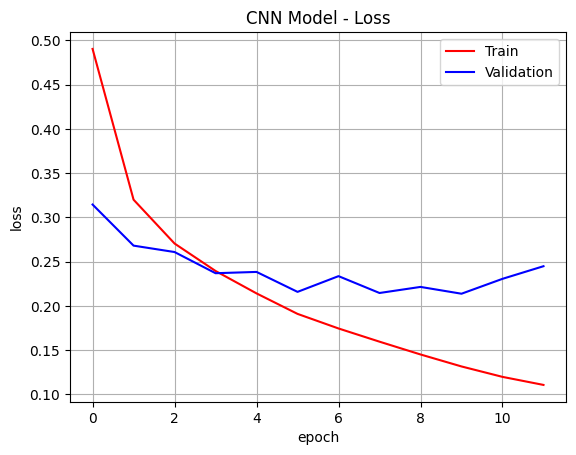

In [ ]:
loss1 = h.history['loss']
loss2 = h.history['val_loss']


# Matlab + plot + libraray
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss1, c='red', label= 'Train')
plt.plot(loss2, c='blue', label= 'Validation')
plt.title('CNN Model - Loss')
plt.xlabel('epoch')
plt.ylabel('loss')  # error
plt.grid(True)
plt.legend()
plt.show()

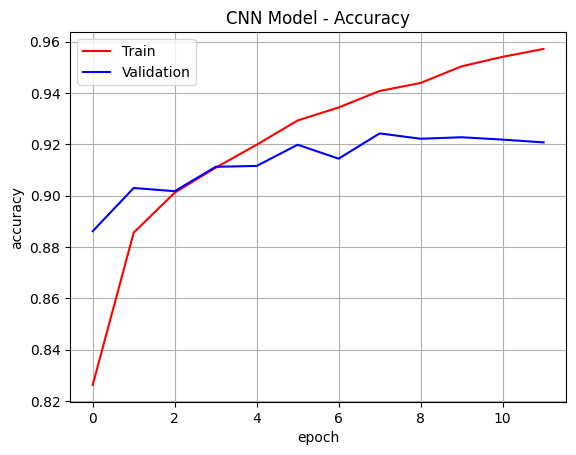

In [ ]:
acc1 = h.history['accuracy']
acc2 = h.history['val_accuracy']

plt.figure()
plt.plot(acc1, c='red', label= 'Train')
plt.plot(acc2, c='blue', label= 'Validation')
plt.title('CNN Model - Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 모델 성능 평가
score = model.evaluate(x_test_scaled, y_test)

print('정확도: %.2f%%' % (score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.2387 - accuracy: 0.9203
정확도: 92.03%


In [ ]:
# 예측!
import numpy as np

y_pred = model.predict(x_test_scaled[0:1])
print(np.argmax(y_pred, axis= 1))

1/1 [==============================] - 0s 28ms/step
[9]


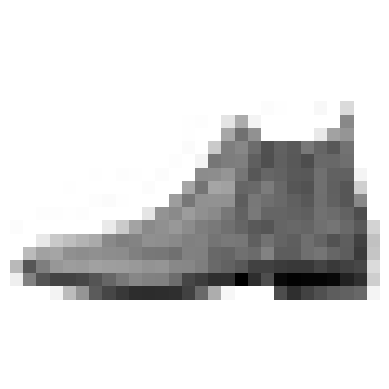

In [ ]:
# 예측한 이미지가 뭔지 확인
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_test_scaled[0:1].reshape(28, 28), cmap='gray_r')  # 9는 앵클부츠
plt.axis('off')
plt.show()

# CNN 이해를 돕는 사이트

TensorSpace Playground -
https://tensorspace.org/index.html

# 가중치 시각화

* 필터를 통해 출력이 높고 낮음을 기하학적인 특성들을 뽑아서 다음층에 전달을 해줌.
* 이런 가중치 값을 뒷쪽으로 계속 전달해줌.

In [ ]:
# 모델 로드하기
from tensorflow import keras

model = keras.models.load_model('best_model.h5')

In [ ]:
model.layers
# 여기서 convolutional layer를 빼내서 시각화

In [ ]:
conv = model.layers[0]

In [ ]:
# 가중치 모양 확인

print(conv.weights[0].shape)  # 2-D, 가중치 (Weight) # 3, 3 -> 필터의 크기. 1 -> 흑백사진(rgb이면 3) 32 -> 필터의 개수
#  이 가중치만 뽑아서 시각화하기
print(conv.weights[1].shape)  # 1-D, 편향 (Bias), y 절편!!

(3, 3, 1, 32)
(32,)


In [ ]:
conv_weights = conv.weights[0].numpy()

In [ ]:
print(conv_weights.shape)

(3, 3, 1, 32)


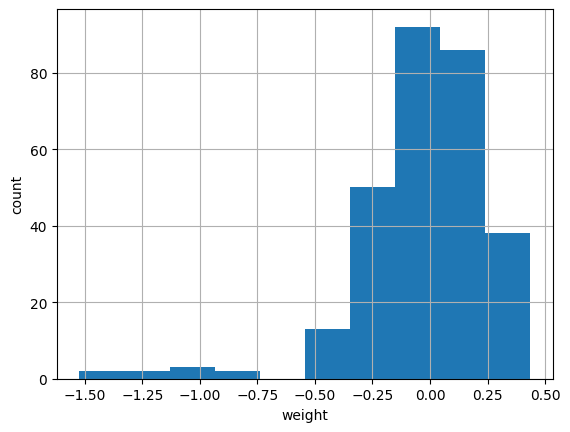

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(conv_weights.reshape(288, 1))  #3 * 3 * 32
plt.xlabel('weight')
plt.ylabel('count')
plt.grid(True)
plt.show()
# 가중치 그래프 (히스토그램)

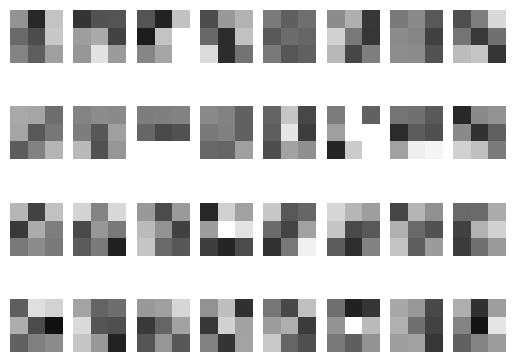

In [ ]:
# 그림 형태로 보기

plt.figure()
# (3, 3, 1, 32) 가로가 3, 세로가 3인 값을 싹다 갖고 와서 이미지를 그림
for idx in range(32):
  plt.subplot(4, 8, (idx + 1))
  plt.imshow(conv_weights[:, :, 0, idx], cmap='gray_r', vmin=-0.5, vmax=0.5) # idx번째 식빵을 갖고 와라
  plt.axis('off')
plt.show()  # 필터의 값 특성맵을 표현

In [ ]:
no_model = keras.Sequential()

no_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [ ]:
no_conv = no_model.layers[0]

In [ ]:
print(no_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_conv_weight = no_conv.weights[0].numpy()

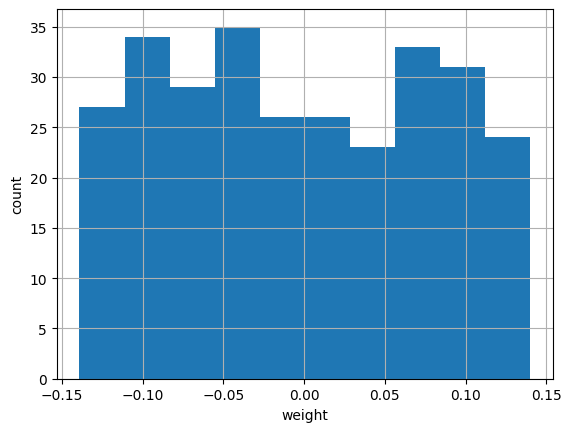

In [ ]:
plt.figure()
plt.hist(no_conv_weight.reshape(288, 1))  #3 * 3 * 32
plt.xlabel('weight')
plt.ylabel('count')
plt.grid(True)
plt.show()

# 아예 빈 Sequential을 만들어내서 가중치 히스토그램을 뽑아보면 무작위로 되어있음
# 그러니까 위에 있는 학습된 모델의 가중치 그래프는 전혀 다른 형태.
# 최적의 가중치를 뽑아낸거임.

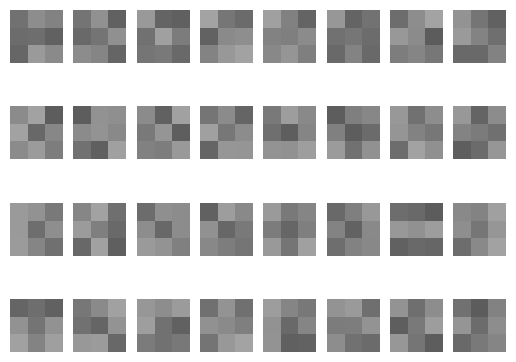

In [ ]:
plt.figure()
# (3, 3, 1, 32) 가로가 3, 세로가 3인 값을 싹다 갖고 와서 이미지를 그림
for idx in range(32):
  plt.subplot(4, 8, (idx + 1))
  plt.imshow(no_conv_weight[:, :, 0, idx], cmap='gray_r', vmin=-0.5, vmax=0.5) # idx번째 식빵을 갖고 와라
  plt.axis('off')
plt.show()  # 필터의 값 특성맵을 표현

# 최초 필터 가중치 값.
# 점점 학습을 해 나가면서 최적의 가중치와 편향을 찾는..

# vmin, vmax를 적용해 그린 그래프를 비교해보면 최초 가중치는 흐리멍텅한 것을 볼 수 있음
# 하지만 학습 한 뒤의 가중치는 명암이 극명하다.

# 함수형 API를 사용하여 특성 맵 시각화하기

함수형 API를 사용하여 특성 맵 시각화하기

지금까지는 케라스 Sequential을 사용했지만 이제는 뭐 음성이나, 영상이나 쓰려면 함수 API를 쓸 수 있다.

이건 Seuential을 할 수 없고 model class를 사용해야 함.

## 함수형으로 Model 만들기

Sequential로 만들면 중간 중간에 계산 값들을 뽑을 수 없는데, 이렇게 함수형으로 만들면 중간에 계산 값을 뽑아서 뭘 할 수 있음.

In [ ]:
### 실행 시키지 않음 ###

# 함수형으로 Model 만들기
# 층을 먼저 만듦

dense1 = keras.layers.Dense(100, activation='relu')   # 첫 번째 은닉층! (입력값이 전달)
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층!

In [ ]:
# 입력과 출력을 함수 형태로 모델을 만든다.

inputs = keras.Input(shape=(784, )) # keras의 input 함수를 이용해서 shape 지정하여 입력을 만듦
hidden = dense1(inputs)
outputs = dense2(hidden)

In [ ]:
model = keras.Model(inputs, outputs)  # 입력층, 은닉층, 출력층을 함수형으로 만들어서 Model Class로 넣어줌

## **실제 코딩은 아래서부터!**

In [ ]:
 model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_2_input')>

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

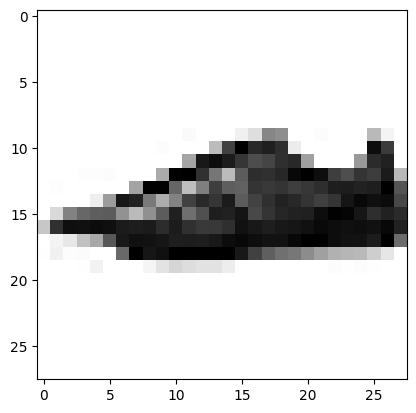

In [ ]:
plt.figure()
plt.imshow(x_train_scaled[0], cmap='gray_r')
plt.show()

1/1 [==============================] - 0s 123ms/step


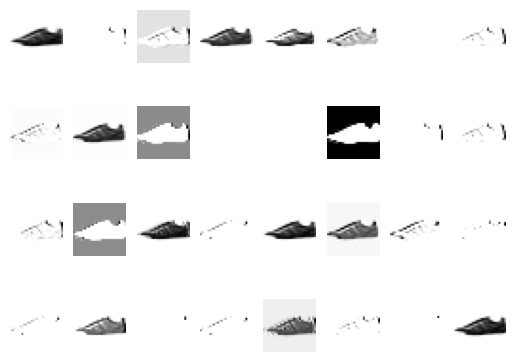

In [ ]:
inputs = x_train_scaled[0]
feature_maps = conv_acti.predict(inputs)

plt.figure()

for idx in range(32):
  plt.subplot(4, 8, (idx + 1))
  plt.imshow(feature_maps[:, :, 0, idx], cmap='gray_r') # idx번째 식빵을 갖고 와라
  plt.axis('off')
plt.show()  # 필터의 값 특성맵을 표현

# 신발 모양으로 뽑아진 애들은 스니커즈의 특성을 잘 뽑아낼 수 있게 잘 학습이 된 것이다.
# 아예 하얀것은 티.. 라던지 원피스라던지 그걸 뽑아내도록 학습이 된

# 윤곽, 실루엣을 보고 우리가 엄마다! 아빠다! 여자다! 라고 판별하듯이
# CNN 또한 이렇게 윤곽선을 바탕으로 판단을 함.

# RNN 다음에는?

ANN-> DNN-> CNN-> RNN-> SimpleRNN, LSTM, GRU
-> Attention-> self-Attention-> Transformer[Vision Trasformer, (BERT, GPT)]

# 순차 데이터

* 순차 데이터 (Sequential Data)는 텍스트나 시계열 데이터 (Time Series Data)와 같이..
* 예를 들어 I am a boy -> 이게 순서가 바뀌면 문법 다 틀린 문장이 되니까. 이런 데이터를 순차 데이터라고 할 수 있음
* 영상.. 이라던가, 시간이라던가

완전 연결 신경망, 합성곱 신경망은...

입력 - - - - > 출력 단방향으로 이루어져 있음 (Feed Forward 신경망)

하지만 순환 신경망은.. 순서가 중요한 순차 데이터에서 이루어짐

# 순환 신경망



내가 출력한 뉴런 출력값을 되먹임 해서 다시 들어감.

그것이 순환 신경망

1. C B A - - - -> ( 뉴런 ) - - - -> Oa

  이 출력된 0a를 자기 자신에게 되먹임함

2. C B - - - - -> ( 뉴런 ) - - - -> Ob

  그 다음 B를 처리할 때, 앞에서 A를 사용해서 만든 출력 Oa를 함께 사용. 하지만 좀 희미해진 ,, Oa ,,
  
  그리고 이 Ob 출력은 다시 자신한테 맥임.

3. C - - - - - -> ( 뉴런 ) - - - -> Oc

  이렇게 해서 C가 들어갈 때에는 C + B + A 가 들어간 Oc가 나오게 됨.

이렇게 샘플을 처리하는 한 단계를 **타임스텝(Timestep)**

### Time step의 단점
(예)
  오늘 점심에 뭐 먹었어? /
  어제 점심에 뭐 먹었어?

  순차 데이터. 순서가 중요한 데이터.

1. 오늘 점심에 뭐 먹었어?를 ([0001] [0010] [0100] [1000]) 이라고 가정했을 때, 이런 데이터를 입력층에 전달 - 순서를 유지한채 전달

2. 순차적으로 데이터가 전달되다 보니까 맨 마지막으로 전달되는 데이터는 기억이 잘 나지만, 맨 처음에 들어간 데이터는 잘 기억이 안됨.
(사람이랑 똑같네) => 장기 의존 (long-term dependencies)

3. 그래서 방안은? LSTM(Long Short-Term Memory): 단기 기억을 늘리겠다

활성화 함수는 tanh를 쓴다.

Hyperbolic Tangent는 S형태의 그래프.

되먹임하고 다시 다른 뉴런으로 전달하는 ... 꼬리에 꼬리를 무는 형태로 된다~ 그게 순환 신경망이다~~

## 순환층의 입력과 출력

샘플: I am a boy

한 글자당 1 * 3의 칸을 만들고 이를 하나씩 넣어줌.

(4, 1, 3)

순서대로 공부해야한다:

DNN(1D) -> CNN(2D) -> RNN(3D)

아님 개거품 물고 포기함.

그래서 배열을 잘 다룰 수 있게끔 해야한다.

3D 데이터가 입력으로 들어감.

y축: 샘플의 갯수, z축: 20(타이스텝), x축: 100(단어 표현 차원)

(20, 100) 입력. -> 은닉층(셀) -> (10, ) 출력

그래서 셀을 어떻게 디자인하느냐에 따라 달라질 수 있음.

# LSTM (Long Short-Term Memory)

: 장단기 기억 의존성이라는 문제를 극복하기 위해서 단기 기억을 늘려서 오래동안 기억할수 있게끔 만듬 모델

: 단기 기억 능력을 장기화하는 모델

# GRU 신경망 훈련하기

: LSTM 너무 복잡해서 계산량이 너무 많아서 그걸 간소화시킨 버전

: 뉴욕 대학교 조경현 교수가 발명한 셀

# IMDB 리뷰 데이터셋

LSTM과 GRU를 써먹어 보자! 하고 한 데이터셋

: 영화 리뷰 데이터. 텐서플로우에서 제공을 하고 있음.

tf.keras.dataset

# 모두를 위한 인공지능

Lecture 05. 인공지능 기술 동향

...